In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU Available:",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number of GPU Available: 1


In [3]:
train_path = 'data/train'
valid_path = 'data/test'
test_path = 'data/img'

In [4]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
valid_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
test = valid_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)



Found 2188 images belonging to 3 classes.
Found 2192 images belonging to 3 classes.
Found 8 images belonging to 3 classes.


In [9]:
imgs,labels = next(train_batches)

In [10]:
def plotimages(image_arr):
    fig,axes= plt.subplots(1,6,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


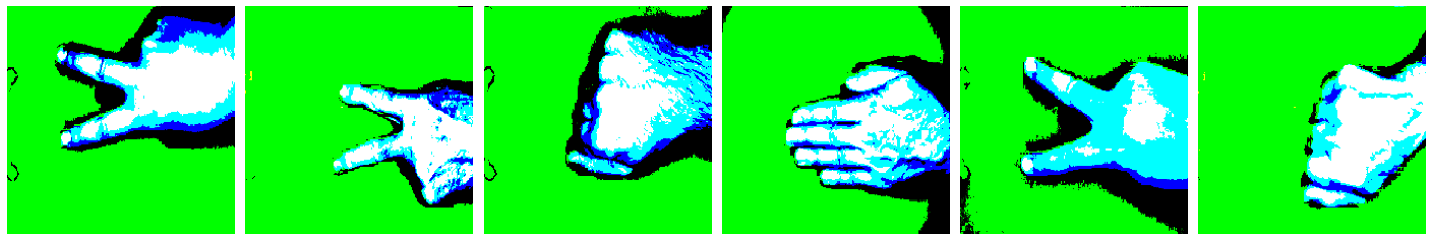

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
plotimages(imgs)
print(labels)

In [150]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

In [122]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [182]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
valid_generator =train_datagen.flow_from_directory(valid_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
testp = train_datagen.flow_from_directory(test_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [156]:
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

In [157]:
model_new.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)       

In [158]:
model_new.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [159]:
t1_start = time.process_time() 
model_new.fit(x=train_generator,validation_data=valid_generator,epochs=10,verbose=1)
t1_stop = time.process_time()
print("Elapsed time during the training in seconds:", t1_stop-t1_start) 

Epoch 1/10
219/219 [==============================] - 26s 111ms/step - loss: 0.6580 - accuracy: 0.6572 - val_loss: 0.1064 - val_accuracy: 0.9694
Epoch 2/10
219/219 [==============================] - 17s 80ms/step - loss: 0.1153 - accuracy: 0.9645 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 3/10
219/219 [==============================] - 19s 87ms/step - loss: 0.0683 - accuracy: 0.9828 - val_loss: 0.0252 - val_accuracy: 0.9936
Epoch 4/10
219/219 [==============================] - 20s 90ms/step - loss: 0.0416 - accuracy: 0.9862 - val_loss: 0.0284 - val_accuracy: 0.9895
Epoch 5/10
219/219 [==============================] - 29s 131ms/step - loss: 0.0355 - accuracy: 0.9857 - val_loss: 0.0460 - val_accuracy: 0.9845
Epoch 6/10
219/219 [==============================] - 27s 125ms/step - loss: 0.0364 - accuracy: 0.9916 - val_loss: 0.0095 - val_accuracy: 0.9977
Epoch 7/10
219/219 [==============================] - 27s 124ms/step - loss: 0.0161 - accuracy: 0.9964 - val_loss: 0.0242 - val_accur

In [14]:
if os.path.isfile('./rps1.h5') is False:
    model.save('rps1.h5')

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpvi3eg89_\assets


In [8]:
model = tf.keras.models.load_model('rps.h5')

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
__________________________________________________

In [13]:
from IPython.display import Image
img= Image(filename='img0.jpg')

In [160]:
image = tf.keras.preprocessing.image.load_img('img1.png',target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = tf.expand_dims(input_arr, 0)
predictions = model_new.predict(input_arr)
score = tf.nn.softmax(predictions[0])

FileNotFoundError: [Errno 2] No such file or directory: 'img1.png'

In [78]:
predictions

array([[1.0000000e+00, 7.6236914e-24, 4.3773579e-13]], dtype=float32)

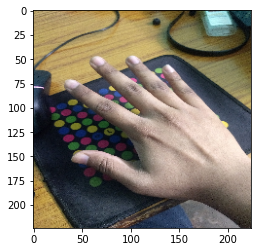

In [72]:
plt.imshow(image)

In [193]:
predictions=model.predict(testp)

In [194]:
predictions 

array([[0.36806664, 0.3224418 , 0.30949157],
       [0.34979537, 0.32040334, 0.32980126],
       [0.32728156, 0.3326158 , 0.3401026 ],
       [0.3599184 , 0.29582757, 0.3442541 ],
       [0.33970398, 0.29422674, 0.36606926],
       [0.35227746, 0.28996322, 0.35775936]], dtype=float32)

In [105]:
predictions

2

In [111]:
from tensorflow.keras.preprocessing import image

In [180]:
img_r = image.load_img('./data/img/rock/img5.png', target_size=(224, 224))
img_p = image.load_img('./data/img/paper/img5.png', target_size=(224, 224))
img_s = image.load_img('./data/img/scissors/img5.png', target_size=(224, 224))
img = image.load_img('./data/test/paper/0t08v9bAaA0mXGCQ.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
model_new.predict(images)

In [181]:
classes

array([[0., 1., 0.]], dtype=float32)

In [183]:
def img_to_arr(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    return images

In [185]:
print(model_new.predict(img_to_arr(img_r)))
print(model_new.predict(img_to_arr(img_p)))
print(model_new.predict(img_to_arr(img_s)))

[[1. 0. 0.]]
[[4.1058563e-23 0.0000000e+00 1.0000000e+00]]
[[1. 0. 0.]]


In [187]:
model_new.predict(testp)

array([[9.0531451e-01, 7.2859973e-02, 2.1825515e-02],
       [5.8567870e-01, 3.9733043e-01, 1.6990827e-02],
       [6.0905460e-03, 2.4046208e-06, 9.9390703e-01],
       [3.1807199e-01, 5.5727223e-03, 6.7635530e-01],
       [2.0887593e-02, 5.2968366e-04, 9.7858274e-01],
       [4.5808914e-01, 5.3654313e-01, 5.3676935e-03]], dtype=float32)

In [196]:
np.argmax(model_new.predict(testp),axis=1)

array([0, 1, 2, 2, 2, 0], dtype=int64)